In [1]:
from sklearn import svm

# Example1

In [2]:
x = [[3, 3], [4, 3], [1, 1],[2,1]]
y = [1, 1, -1, -1]

model = svm.SVC(kernel='linear')
model.fit(x, y)

SVC(kernel='linear')

In [3]:
# 輸出支持向量
print(model.support_vectors_)

[[2. 1.]
 [3. 3.]]


In [4]:
# 支持向量的點index
print(model.support_)

[3 0]


In [5]:
# 二側各有幾個點
print(model.n_support_)

[1 1]


In [6]:
#加入新樣本點進行預測分類
model.predict([[0.4999,3]])

array([-1])

In [7]:
# 超平面座標
model.coef_      #二維有兩個權重

array([[0.4, 0.8]])

In [8]:
model.intercept_

array([-2.6])

# Example2

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

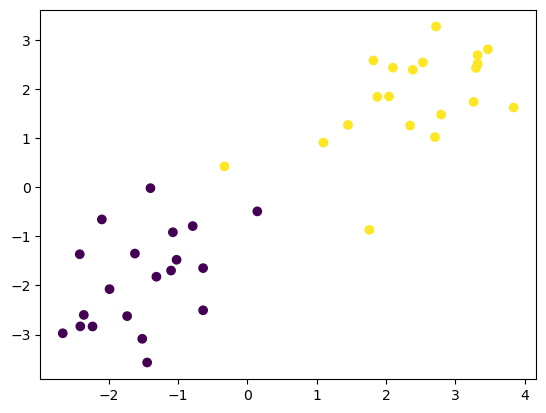

In [10]:
#np.r_[A,B]--> 將A，B 進行(垂直)合併，但欄數必須相同
#np.c_[A,B]--> 將A，B 進行(水平)合併，但列數必須相同
#np.random.randn(20, 2)-->隨機產生0-1(不含1)的隨機小數，結構為 20*2
x_data = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
y_data = [0]*20 +[1]*20


plt.scatter(x_data[:,0],x_data[:,1],c=y_data)
plt.show()

In [11]:
#fit the model
model = svm.SVC(C=1, kernel='linear')#C大-->硬邊界 / C小-->軟邊界
model.fit(x_data, y_data)

SVC(C=1, kernel='linear')

In [12]:
model.coef_

array([[0.80348915, 0.63383589]])

In [13]:
model.intercept_

array([0.1361297])

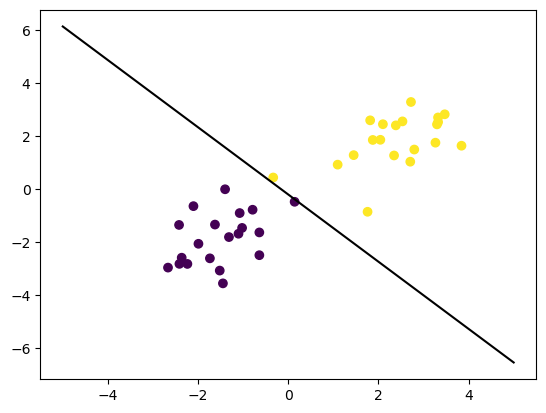

In [14]:
# 超平面
plt.scatter(x_data[:,0],x_data[:,1],c=y_data)
x_test = np.array([[-5],[5]])
d = -model.intercept_/model.coef_[0][1]
k = -model.coef_[0][0]/model.coef_[0][1]
y_test = d + k*x_test
plt.plot(x_test, y_test, 'k')
plt.show()

In [15]:
model.support_vectors_

array([[-1.40032689, -0.01811094],
       [ 0.1421949 , -0.49063099],
       [-0.79027629, -0.79027195],
       [-0.33251152,  0.42555319],
       [ 1.7595626 , -0.86721287]])

In [16]:
# 繪製通過 SVM 的分界線
b1 = model.support_vectors_[0]
y_down = k*x_test + (b1[1] - k*b1[0])
b2 = model.support_vectors_[-1]
y_up = k*x_test + (b2[1] - k*b2[0])

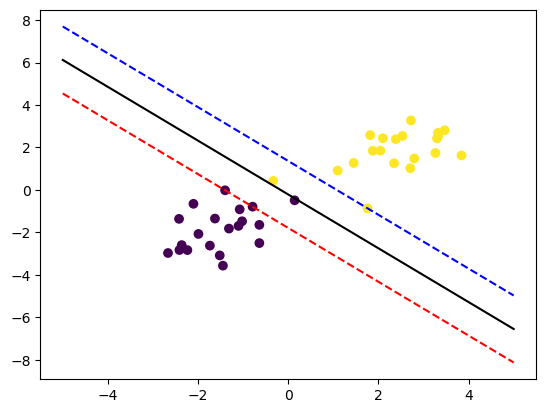

In [17]:
plt.scatter(x_data[:,0],x_data[:,1],c=y_data)
x_test = np.array([[-5],[5]])
d = -model.intercept_/model.coef_[0][1]
k = -model.coef_[0][0]/model.coef_[0][1]
y_test = d + k*x_test
plt.plot(x_test, y_test, 'k')
plt.plot(x_test, y_down, 'r--')
plt.plot(x_test, y_up, 'b--')
plt.show()